<a href="https://colab.research.google.com/github/W4R10CK99/TransferLearning1/blob/main/CNN_transferLearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt


In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset_path = '/content/drive/My Drive/Dataset'

In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

In [7]:
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/train',
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary',  # Binary classification
    subset='training'
)

Found 69 images belonging to 2 classes.


In [8]:
validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/validate',
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary',  # Binary classification
    subset='validation'
)

Found 3 images belonging to 2 classes.


In [9]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [10]:
for layer in base_model.layers:
    layer.trainable = False

In [11]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [15]:
import math

steps_per_epoch = math.ceil(train_generator.samples / train_generator.batch_size)
validation_steps = math.ceil(validation_generator.samples / validation_generator.batch_size)

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=30,
    callbacks=[early_stopping]
)

Epoch 1/30
5/5 [==============================] - 7s 2s/step - loss: 0.1401 - accuracy: 0.9565 - val_loss: 0.0186 - val_accuracy: 1.0000
Epoch 2/30
5/5 [==============================] - 4s 1s/step - loss: 0.0651 - accuracy: 0.9565 - val_loss: 0.0501 - val_accuracy: 1.0000
Epoch 3/30
5/5 [==============================] - 3s 636ms/step - loss: 5.3140e-04 - accuracy: 1.0000 - val_loss: 0.8322 - val_accuracy: 0.6667
Epoch 4/30
5/5 [==============================] - 3s 569ms/step - loss: 0.0445 - accuracy: 0.9855 - val_loss: 1.9602 - val_accuracy: 0.6667
Epoch 5/30
5/5 [==============================] - 4s 728ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4723 - val_accuracy: 0.6667
Epoch 6/30
5/5 [==============================] - 3s 601ms/step - loss: 1.5748e-04 - accuracy: 1.0000 - val_loss: 0.1824 - val_accuracy: 1.0000


In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [18]:
img_path = '/content/img1.JPEG'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

In [19]:
prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("This is a metalPlate")
else:
    print("This is not a metalPlate")

1/1 [==============================] - 1s 1s/step
This is not a metalPlate


In [20]:
img_path = '/content/img2.JPEG'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

In [21]:
prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("This is a metalPlate")
else:
    print("This is not a metalPlate")

1/1 [==============================] - 0s 19ms/step
This is a metalPlate


In [22]:
img_path = '/content/img3.JPEG'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("This is a metalPlate")
else:
    print("This is not a metalPlate")

1/1 [==============================] - 0s 18ms/step
This is a metalPlate


In [23]:
from PIL import Image

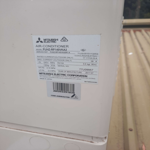

In [34]:
Image.open('/content/img3.JPEG').resize((150,150))

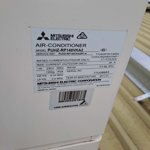

In [35]:
Image.open('/content/img2.JPEG').resize((150,150))

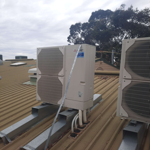

In [36]:
Image.open('/content/img1.JPEG').resize((150,150))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 18910017 (72.14 MB)
Trainable params: 4195329 (16.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [28]:
model.save('transferLearning1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
model.save_weights('model_weights.h5')

In [37]:
from tensorflow.keras.utils import plot_model

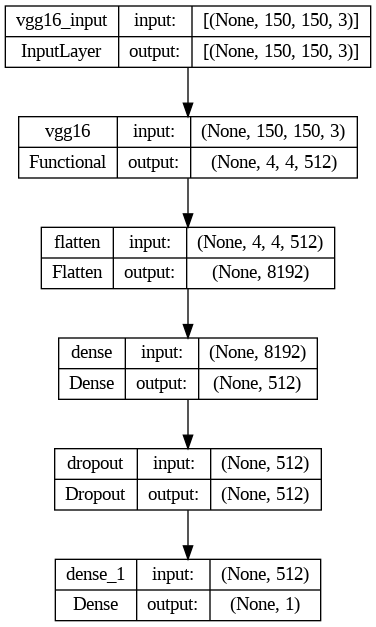

In [46]:
plot_model(model, show_shapes=True)

# CNN from scratch without transfer learning

In [39]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [40]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [41]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
history2 = model2.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=30,
    callbacks=[early_stopping]
)

Epoch 1/30
5/5 [==============================] - 8s 557ms/step - loss: 1.3283 - accuracy: 0.5507 - val_loss: 0.6757 - val_accuracy: 0.6667
Epoch 2/30
5/5 [==============================] - 3s 614ms/step - loss: 0.6965 - accuracy: 0.4638 - val_loss: 0.6862 - val_accuracy: 0.6667
Epoch 3/30
5/5 [==============================] - 3s 713ms/step - loss: 0.6664 - accuracy: 0.5507 - val_loss: 0.6375 - val_accuracy: 0.6667
Epoch 4/30
5/5 [==============================] - 4s 773ms/step - loss: 0.6187 - accuracy: 0.6667 - val_loss: 0.5911 - val_accuracy: 0.6667
Epoch 5/30
5/5 [==============================] - 3s 670ms/step - loss: 0.5329 - accuracy: 0.7391 - val_loss: 0.6087 - val_accuracy: 0.6667
Epoch 6/30
5/5 [==============================] - 3s 625ms/step - loss: 0.4178 - accuracy: 0.7536 - val_loss: 0.5707 - val_accuracy: 0.6667
Epoch 7/30
5/5 [==============================] - 4s 882ms/step - loss: 0.4124 - accuracy: 0.7971 - val_loss: 0.4660 - val_accuracy: 0.6667
Epoch 8/30
5/5 [====

In [43]:
img_path = '/content/img3.JPEG'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model2.predict(img_array)
if prediction[0] > 0.5:
    print("This is a metalPlate")
else:
    print("This is not a metalPlate")

1/1 [==============================] - 0s 270ms/step
This is not a metalPlate


In [44]:
img_path = '/content/img2.JPEG'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model2.predict(img_array)
if prediction[0] > 0.5:
    print("This is a metalPlate")
else:
    print("This is not a metalPlate")

1/1 [==============================] - 0s 18ms/step
This is not a metalPlate


In [45]:
img_path = '/content/img1.JPEG'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model2.predict(img_array)
if prediction[0] > 0.5:
    print("This is a metalPlate")
else:
    print("This is not a metalPlate")

1/1 [==============================] - 0s 17ms/step
This is not a metalPlate


# Using another pretrained model for tansfer learning

In [47]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

In [48]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

17225924/17225924 [==============================] - 0s 0us/step


In [49]:
model3 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [50]:
# Compile the model
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [55]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 4, 4, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 3754177 (14.32 MB)
Trainable params: 525

In [51]:
history3 = model3.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=30,
    callbacks=[early_stopping]
)

Epoch 1/30
5/5 [==============================] - 7s 849ms/step - loss: 0.1866 - accuracy: 0.9130 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 2/30
5/5 [==============================] - 3s 748ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 4.9000e-05 - val_accuracy: 1.0000
Epoch 3/30
5/5 [==============================] - 4s 695ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 4.1017e-04 - val_accuracy: 1.0000
Epoch 4/30
5/5 [==============================] - 4s 704ms/step - loss: 4.5259e-04 - accuracy: 1.0000 - val_loss: 4.0567e-05 - val_accuracy: 1.0000
Epoch 5/30
5/5 [==============================] - 3s 640ms/step - loss: 6.7653e-05 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 6/30
5/5 [==============================] - 3s 762ms/step - loss: 1.8277e-05 - accuracy: 1.0000 - val_loss: 8.4696e-04 - val_accuracy: 1.0000
Epoch 7/30
5/5 [==============================] - 4s 807ms/step - loss: 1.1248e-05 - accuracy: 1.0000 - val_loss: 1.4103e-04 - val_a

In [52]:
img_path = '/content/img3.JPEG'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model3.predict(img_array)
if prediction[0] > 0.5:
    print("This is a metalPlate")
else:
    print("This is not a metalPlate")

1/1 [==============================] - 47s 47s/step
This is a metalPlate


In [53]:
img_path = '/content/img2.JPEG'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model3.predict(img_array)
if prediction[0] > 0.5:
    print("This is a metalPlate")
else:
    print("This is not a metalPlate")

1/1 [==============================] - 0s 19ms/step
This is a metalPlate


In [54]:
img_path = '/content/img1.JPEG'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model3.predict(img_array)
if prediction[0] > 0.5:
    print("This is a metalPlate")
else:
    print("This is not a metalPlate")

1/1 [==============================] - 0s 19ms/step
This is not a metalPlate


In [56]:
model3.save('lightCNN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
